# The Pythagorean three body problem

<ul id="top">
<li><a href="#Loading-packages-and-functions"> 
             Loading packages and functions</a></li>
    
<li><a href="#Definition-of-the-problem"> 
             Definition of the problem</a></li>  

<li><a href="#Choose-steps-sizes">
             Choose steps sizes</a></li>

<li><a href="#Compute-exact-solution">
             Compute exact solution</a></li>
             
<li><a href="#Float64-integrations">
              Float64 integrations</a></li>

</ul>  

## Loading packages and functions

In [1]:
using LinearAlgebra
using Plots
using JLD2, Dates, LaTeXStrings
using OrdinaryDiffEq
using BenchmarkTools

In [2]:
PATH_SRC="../../src_seq/"
PATH_DATA="./Data/"

include(string(PATH_SRC,"IRKGL_SEQ.jl"))
using .IRKGL_SEQ 


PATH_SRC="../../src_simd/"

include(string(PATH_SRC,"IRKGL_SIMD.jl"))
using .IRKGL_SIMD 

In [3]:
struct mysolution
   sol::ODESolution
   iters::Vector{Float64}
   steps::Float64
end


function coord_bar(out,u)
    
     @. out[:,1,1]=u[:,3,1]-u[:,1,1]
     @. out[:,2,1]=u[:,1,1]-u[:,2,1]
     @. out[:,3,1]=u[:,2,1]-u[:,3,1]
     
     return copy(out)
 
 end

coord_bar (generic function with 1 method)

In [4]:
run=false

false

 <a href="#top">Back to the top</a>
 
 ## Definition of the problem

In [5]:
PATH_ODES="../../ODEProblems/"

include(string(PATH_ODES,"InitialPythagorean3BPREL.jl"))
include(string(PATH_ODES,"Nbody3REL.jl"))

NbodyODE3REL! (generic function with 2 methods)

### Initial value problem: Pythagorean 3 body problem

In [6]:
u0, Gm, bodylist = InitialPythagorean3BPREL(Float64)
dim=length(size(u0))
N = length(Gm)

t0=0.
tf=63.
tf2=2*tf
tf4=4*tf

prob = ODEProblem(NbodyODE3REL!, u0, (t0,tf), Gm)
prob2 = ODEProblem(NbodyODE3REL!, u0, (t0,tf2), Gm)
prob4 = ODEProblem(NbodyODE3REL!, u0, (t0,tf4), Gm)

setprecision(BigFloat, 108);
u0B, GmB, bodylist = InitialPythagorean3BPREL(BigFloat)
tspanB=(BigFloat(t0),BigFloat(tf))
probB = ODEProblem(NbodyODE3REL!,u0B,tspanB,GmB);

## IRKGL

### IRKGL_Seq

In [7]:
dt=0.3

alg=IRKGL_Seq(s=8, initial_interp=1,  myoutputs=true)

sol,iters,steps=solve(prob,alg,dt=dt, save_everystep=false, adaptive=false)
sol2,iters2,steps2=solve(prob2,alg,dt=dt, save_everystep=false, adaptive=false)
sol4,iters4,steps4=solve(prob4,alg,dt=dt, save_everystep=false, adaptive=false)

[length(sol.t) steps length(sol2.t) steps2 length(sol4.t) steps4]


1×6 Matrix{Int64}:
 2  210  2  420  2  840

In [8]:
@time sol,iters,steps=solve(prob,alg,dt=dt, save_everystep=false, adaptive=false);

  0.001228 seconds (2.57 k allocations: 89.102 KiB)


In [9]:
@time sol2,iters2,steps2=solve(prob2,alg,dt=dt, save_everystep=false, adaptive=false);

  0.002090 seconds (3.20 k allocations: 115.352 KiB)


In [10]:
@time sol4,iters4,steps4=solve(prob4,alg,dt=dt, save_everystep=false, adaptive=false);

  0.003777 seconds (4.46 k allocations: 167.883 KiB)


### IRKGL_simd

In [11]:
dt=0.3

alg=IRKGL_simd(s=8, initial_interp=1,  myoutputs=true)

sol,iters,steps=solve(prob,alg,dt=dt, save_everystep=false, adaptive=false)
sol2,iters2,steps2=solve(prob2,alg,dt=dt, save_everystep=false, adaptive=false)
sol4,iters4,steps4=solve(prob4,alg,dt=dt, save_everystep=false, adaptive=false)

[length(sol.t) steps length(sol2.t) steps2 length(sol4.t) steps4]

1×6 Matrix{Int64}:
 2  210  2  420  2  840

In [12]:
@time sol,iters,steps=solve(prob,alg,dt=dt, save_everystep=false, adaptive=false);

  0.000451 seconds (2.55 k allocations: 88.227 KiB)


In [13]:
@time sol2,iters2,steps2=solve(prob2,alg,dt=dt, save_everystep=false, adaptive=false);

  0.000670 seconds (3.18 k allocations: 114.477 KiB)


In [14]:
@time sol4,iters4,steps4=solve(prob4,alg,dt=dt, save_everystep=false, adaptive=false);

  0.001074 seconds (4.45 k allocations: 167.008 KiB)


## IRKNGL

### IRKNGL_seq

In [15]:
dt=0.3

alg=IRKNGL_Seq(s=8, initial_interp=1,  myoutputs=true)

sol,iters,steps=solve(prob,alg,dt=dt, save_everystep=false, adaptive=false)
sol2,iters2,steps2=solve(prob2,alg,dt=dt, save_everystep=false, adaptive=false)
sol4,iters4,steps4=solve(prob4,alg,dt=dt, save_everystep=false, adaptive=false)

[length(sol.t) steps length(sol2.t) steps2 length(sol4.t) steps4]


1×6 Matrix{Int64}:
 2  210  2  420  2  840

In [16]:
@time sol,iters,steps=solve(prob,alg,dt=dt, save_everystep=false, adaptive=false);

  0.001226 seconds (2.57 k allocations: 89.055 KiB)


In [17]:
@time sol2,iters2,steps2=solve(prob2,alg,dt=dt, save_everystep=false, adaptive=false);

  0.001500 seconds (3.20 k allocations: 115.305 KiB)


In [18]:
@time sol4,iters4,steps4=solve(prob4,alg,dt=dt, save_everystep=false, adaptive=false);

  0.002561 seconds (4.46 k allocations: 167.836 KiB)


### IRKNGL_simd

In [19]:
dt=0.3

alg=IRKNGL_simd(s=8, initial_interp=1,  myoutputs=true)

sol,iters,steps=solve(prob,alg,dt=dt, save_everystep=false, adaptive=false)
sol2,iters2,steps2=solve(prob2,alg,dt=dt, save_everystep=false, adaptive=false)
sol4,iters4,steps4=solve(prob4,alg,dt=dt, save_everystep=false, adaptive=false)

[length(sol.t) steps length(sol2.t) steps2 length(sol4.t) steps4]


1×6 Matrix{Int64}:
 2  210  2  420  2  840

In [20]:
@time sol,iters,steps=solve(prob,alg,dt=dt, save_everystep=false, adaptive=false);

  0.000371 seconds (2.55 k allocations: 88.180 KiB)


In [21]:
@time sol2,iters2,steps2=solve(prob2,alg,dt=dt, save_everystep=false, adaptive=false);

  0.000475 seconds (3.18 k allocations: 114.430 KiB)


In [22]:
@time sol4,iters4,steps4=solve(prob4,alg,dt=dt, save_everystep=false, adaptive=false);

  0.000709 seconds (4.45 k allocations: 166.961 KiB)


## Vern9

In [11]:
sol_Vern =solve(prob,Vern9(), dt=dt, save_everystep=false, adaptive=false)
sol_Vern2 =solve(prob2,Vern9(), dt=dt, save_everystep=false, adaptive=false)
sol_Vern4 =solve(prob4,Vern9(), dt=dt, save_everystep=false, adaptive=false)

[length(sol_Vern.t) length(sol_Vern2.t) length(sol_Vern4.t)]

1×3 Matrix{Int64}:
 2  2  2

In [14]:
@time sol_Vern =solve(prob,Vern9(), dt=dt, save_everystep=false, adaptive=false);

  0.000606 seconds (52 allocations: 15.391 KiB)


In [15]:
@time sol_Vern2 =solve(prob2,Vern9(), dt=dt, save_everystep=false, adaptive=false);

  0.002787 seconds (52 allocations: 15.391 KiB)


In [16]:
@time sol_Vern4 =solve(prob4,Vern9(), dt=dt, save_everystep=false, adaptive=false);

  0.005131 seconds (52 allocations: 15.391 KiB)


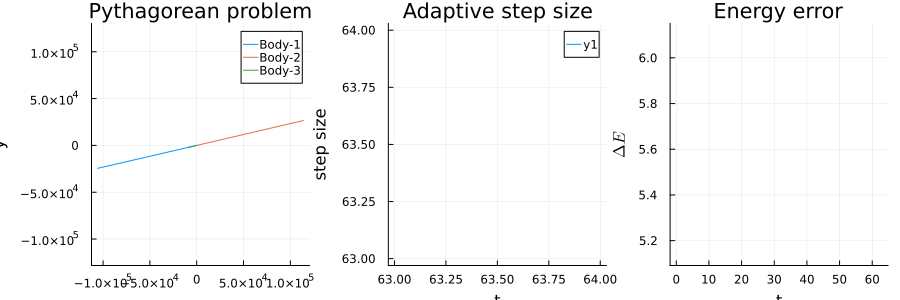

In [14]:
bodylist = ["Body-1", "Body-2", "Body-3"]
pl = plot(title="Pythagorean problem",xlabel="x", ylabel="y",aspect_ratio=1)

out=similar(u0)
ulist =[coord_bar(out,u) for u in sol.u]
tlist = sol.t[1:end]

for j = 1:3
 xlist  = map(u->u[1,j,1], ulist)
 ylist  = map(u->u[2,j,1], ulist)
 pl = plot!(xlist,ylist, label = bodylist[j])   
end  

pl2=plot(xlabel="t", ylabel="step size",title="Adaptive step size")
steps =sol.t[2:end]-sol.t[1:end-1]
pl2=plot!(sol.t[2:end],steps)

setprecision(BigFloat, 256)
u0Big=BigFloat.(u0)
GmBig=BigFloat.(Gm)

E0=NbodyEnergy3REL(u0Big,GmBig)
ΔE1 = map(x->NbodyEnergy3REL(BigFloat.(x),GmBig), sol.u)./E0.-1
pl3=plot(title="Energy error", xlabel="t", ylabel=L"\Delta E")
pl3=plot!(sol.t,log10.(abs.(ΔE1)), label="")

plot(pl,pl2,pl3, layout=(1,3), size=(900,300))